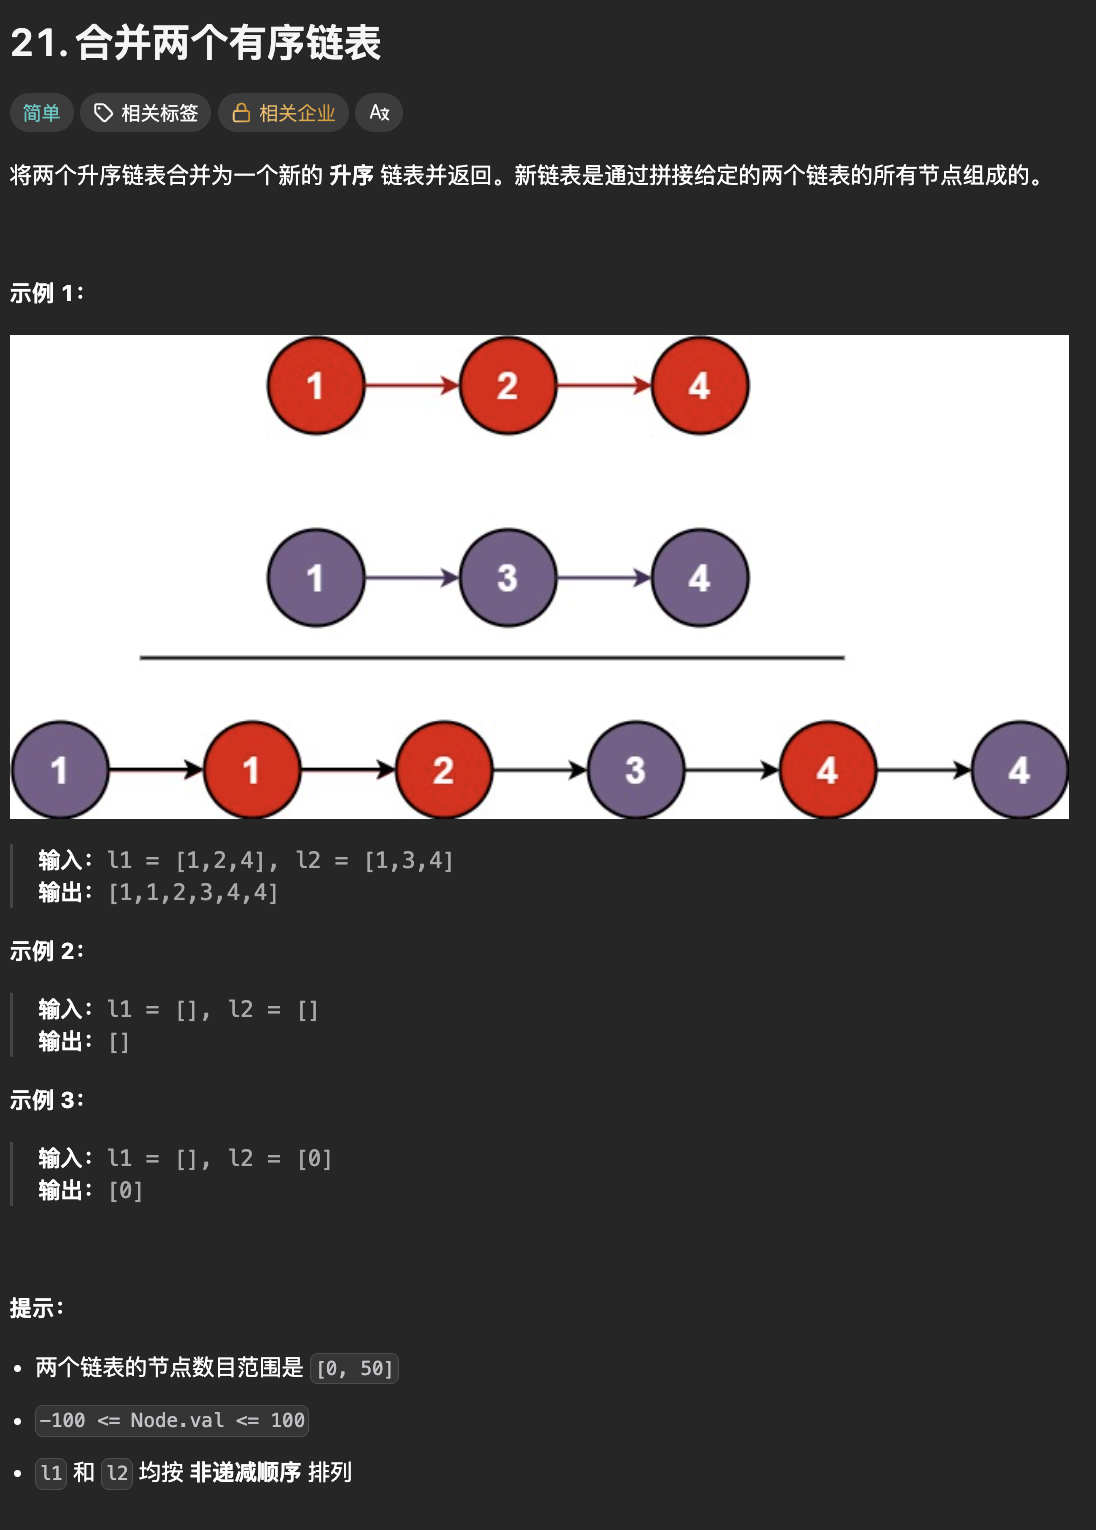

## 易错点1：是return prehead.next，而不是return prev.next

## 易错点2： 忘记       
prehead = ListNode(-1)
老往了下面这一句        

prev = prehead

ListNode(...) 创建的是 节点对象（Node），prehead 固定 → 用来保存链表头
prev 是用来移动、拼接链表的指针。



In [ ]:
from typing import Optional, List

# ==========================================
# 1. 定义链表节点结构
# ==========================================
class ListNode:
    # 初始化函数，定义节点的值(val)和指向下一个节点的指针(next)
    def __init__(self, val=0, next=None):
        self.val = val    # 节点存储的数据
        self.next = next  # 指向下一个节点的指针，默认为 None

# ==========================================
# 2. 核心解法：迭代法
# ==========================================
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        # 创建一个“哨兵节点”（虚拟头节点），值为 -1 (任意值均可)。
        # 作用：简化代码，避免处理“新链表第一个节点该是谁”这种边界情况。
        prehead = ListNode(-1)
        
        # prev 指针代表“新链表当前最后一个节点”。
        # 我们后续会不断把较小的节点接到 prev 后面。
        prev = prehead
        
        # 开启循环：只要 list1 和 list2 都不为空，就一直比较。
        # 因为只有当 两个链表都不为空 时，你才能比较它们当前节点的值。如果其中一个空了，循环就结束。
        while list1 and list2:
            # 比较两个链表头节点的值
            if list1.val <= list2.val:
                # 如果 list1 的值更小（或相等），把 prev 的 next 指向 list1
                prev.next = list1
                # list1 的指针向后移动一位，因为当前节点已经处理过了
                list1 = list1.next
            else:
                # 否则（即 list2 更小），把 prev 的 next 指向 list2
                prev.next = list2
                # list2 的指针向后移动一位
                list2 = list2.next
            
            # 无论接了谁，新链表的指针 prev 都要往后移动一步，
            # 准备好去接下一个节点。
            prev = prev.next
        
        # 循环结束后，肯定有一个链表为空，另一个可能还有剩余节点。
        # 因为原链表是有序的，直接把剩下的部分接到 prev 后面即可。
        # 如果 list1 还有剩，就接 list1；否则接 list2。
        # prev.next = list1 if list1 is not None else list2 #和下面等价
        if list1 is not None:
            # 如果 list1 还有剩余节点
            prev.next = list1
        else:
            # 否则（说明 list1 空了，或者是两个都空了），接上 list2
            # 注意：即使 list2 也是 None，接上 None 也是对的（表示链表结束）
            prev.next = list2
        
        # 返回哨兵节点的下一个节点。
        # 因为 prehead 是假的，prehead.next 才是合并后真正的头节点。
        return prehead.next

# ==========================================
# 3. 辅助工具：用于本地测试生成和打印链表
# ==========================================
def create_linked_list(arr: List[int]) -> Optional[ListNode]:
    """将 Python 的列表 [1,2,3] 转换为链表 1->2->3"""
    # 如果列表为空，返回 None
    if not arr:
        return None
    # 用列表第一个元素创建头节点
    head = ListNode(arr[0])
    # current 指针用于在构建过程中向后移动
    current = head
    # 遍历列表中剩下的元素
    for val in arr[1:]:
        # 创建新节点，并链接到当前节点后面
        current.next = ListNode(val)
        # 指针后移
        current = current.next
    # 返回头节点
    return head

def print_linked_list(node: Optional[ListNode]) -> List[int]:
    """将链表 1->2->3 转换回列表 [1,2,3] 以便打印结果"""
    result = []
    # 只要节点不为空，就一直遍历
    while node:
        # 把当前节点的值加入列表
        result.append(node.val)
        # 移动到下一个节点
        node = node.next
    return result

# ==========================================
# 4. 主程序入口（测试用例）
# ==========================================
if __name__ == "__main__":
    # 实例化解题对象
    solution = Solution()
    
    # 定义三个测试用例
    test_cases = [
        ([1, 2, 4], [1, 3, 4]), # 示例 1
        ([], []),               # 示例 2
        ([], [0])               # 示例 3
    ]

    print("--- 迭代法测试结果 ---")
    # 遍历每一个测试用例
    for l1_arr, l2_arr in test_cases:
        # 将列表转换为链表对象
        l1 = create_linked_list(l1_arr)
        l2 = create_linked_list(l2_arr)
        
        # 调用合并函数
        result_node = solution.mergeTwoLists(l1, l2)
        
        # 打印输入和输出
        print(f"输入: l1={l1_arr}, l2={l2_arr}")
        # 将结果链表转回列表打印，方便观察
        print(f"输出: {print_linked_list(result_node)}")
        print("--------------------")

--- 迭代法测试结果 ---
输入: l1=[1, 2, 4], l2=[1, 3, 4]
输出: [1, 1, 2, 3, 4, 4]
--------------------
输入: l1=[], l2=[]
输出: []
--------------------
输入: l1=[], l2=[0]
输出: [0]
--------------------


In [2]:
from typing import Optional, List

# ==========================================
# 1. 定义链表节点结构
# ==========================================
class ListNode:
    # 初始化函数
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# ==========================================
# 2. 核心解法：递归法
# ==========================================
class Solution:
    def mergeTwoLists(self, list1: Optional[ListNode], list2: Optional[ListNode]) -> Optional[ListNode]:
        # --- 递归终止条件（Base Case） ---
        
        # 如果 list1 为空，没法合并了，直接返回 list2
        if not list1:
            return list2
        # 如果 list2 为空，没法合并了，直接返回 list1
        if not list2:
            return list1
            
        # --- 递归逻辑（Recursive Step） ---
        
        # 比较当前两个头节点的值
        if list1.val < list2.val:
            # 情况 A: list1 比较小。
            # 所以 list1 应该是当前这一步的头节点。
            # 那么 list1 的下一个节点接什么呢？
            # 接 "list1剩下的部分" 和 "list2" 合并后的结果。
            # 这里调用函数自己，进行递归。
            list1.next = self.mergeTwoLists(list1.next, list2)
            
            # 这一层处理完了，把确定的头节点 list1 返回给上一层
            return list1
        else:
            # 情况 B: list2 比较小（或相等）。
            # 所以 list2 应该是当前这一步的头节点。
            # list2 的下一个节点，去接 "list1" 和 "list2剩下的部分" 合并后的结果。
            list2.next = self.mergeTwoLists(list1, list2.next)
            
            # 这一层处理完了，把确定的头节点 list2 返回给上一层
            return list2

# ==========================================
# 3. 辅助工具：用于本地测试
# ==========================================
def create_linked_list(arr: List[int]) -> Optional[ListNode]:
    """将列表转换为链表"""
    if not arr:
        return None
    head = ListNode(arr[0])
    current = head
    for val in arr[1:]:
        current.next = ListNode(val)
        current = current.next
    return head

def print_linked_list(node: Optional[ListNode]) -> List[int]:
    """将链表转换为列表"""
    result = []
    while node:
        result.append(node.val)
        node = node.next
    return result

# ==========================================
# 4. 主程序入口
# ==========================================
if __name__ == "__main__":
    solution = Solution()
    
    test_cases = [
        ([1, 2, 4], [1, 3, 4]),
        ([], []),
        ([], [0])
    ]

    print("--- 递归法测试结果 ---")
    for l1_arr, l2_arr in test_cases:
        # 每次测试前重新创建链表，因为递归会修改链表结构
        l1 = create_linked_list(l1_arr)
        l2 = create_linked_list(l2_arr)
        
        result_node = solution.mergeTwoLists(l1, l2)
        
        print(f"输入: l1={l1_arr}, l2={l2_arr}")
        print(f"输出: {print_linked_list(result_node)}")
        print("--------------------")

--- 递归法测试结果 ---
输入: l1=[1, 2, 4], l2=[1, 3, 4]
输出: [1, 1, 2, 3, 4, 4]
--------------------
输入: l1=[], l2=[]
输出: []
--------------------
输入: l1=[], l2=[0]
输出: [0]
--------------------


In [10]:
from typing import Optional, List

# ==========================================
# 1. 定义链表节点结构
# ==========================================
class ListNode:
    # 初始化函数，定义节点的值(val)和指向下一个节点的指针(next)
    def __init__(self, val=0, next=None):
        self.val = val    # 节点存储的数据
        self.next = next  # 指向下一个节点的指针，默认为 None

# ==========================================
# 2. 核心解法：迭代法
# ==========================================
class Solution:
    def mergeTwoLists(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        # 在l1和l2的按序合并得弄一条新链，因此要new一个新的节点。
        # 下面的prehead和pre指向同一个对象。过程中：prehead 不动，prev 不断移动去指向新的对象
        prehead = ListNode(-1)#：在内存里放了个盒子（节点），然后贴了一张叫 prehead 的条子在上面。
        prev = prehead #并没有复制一个新的盒子！你只是写了一张新的条子叫 prev，然后把它贴在了同一个盒子上。
        # prev = prehead 实际上是**“分身术”**：创造一个可以移动的替身（prev）去干活，保留本体（prehead）用来最后交差

        while l1 and l2:
            if l1.val <= l2.val:
                prev.next = l1
                l1 = l1.next

            else:
                prev.next = l2
                l2 = l2.next
            
            # 无论接了谁，新链表的指针 prev 都要往后移动一步，
            # 准备好去接下一个节点。
            prev = prev.next

            if l1 is None:
                #  # 如果 list1 还有剩余节点
                prev.head = l1
            else:
                #  # 否则（说明 list1 空了，或者是两个都空了），接上 list2
            # 注意：即使 list2 也是 None，接上 None 也是对的（表示链表结束）
                prev.head = l2
        return prehead.next

# ==========================================
# 3. 辅助工具：用于本地测试生成和打印链表
# ==========================================
def create_linked_list(arr: List[int]) -> Optional[ListNode]:
    """将 Python 的列表 [1,2,3] 转换为链表 1->2->3"""
    # 如果列表为空，返回 None
    if not arr:
        return None
    # 用列表第一个元素创建头节点
    head = ListNode(arr[0])
    # current 指针用于在构建过程中向后移动
    current = head
    # 遍历列表中剩下的元素
    for val in arr[1:]:
        # 创建新节点，并链接到当前节点后面
        current.next = ListNode(val)
        # 指针后移
        current = current.next
    # 返回头节点
    return head

def print_linked_list(node: Optional[ListNode]) -> List[int]:
    """将链表 1->2->3 转换回列表 [1,2,3] 以便打印结果"""
    result = []
    # 只要节点不为空，就一直遍历
    while node:
        # 把当前节点的值加入列表
        result.append(node.val)
        # 移动到下一个节点
        node = node.next
    return result

# ==========================================
# 4. 主程序入口（测试用例）
# ==========================================
if __name__ == "__main__":
    # 实例化解题对象
    solution = Solution()
    
    # 定义三个测试用例
    test_cases = [
        ([1, 2, 4], [1, 3, 4]), # 示例 1
        ([], []),               # 示例 2
        ([], [0])               # 示例 3
    ]

    print("--- 迭代法测试结果 ---")
    # 遍历每一个测试用例
    for l1_arr, l2_arr in test_cases:
        # 将列表转换为链表对象
        l1 = create_linked_list(l1_arr)
        l2 = create_linked_list(l2_arr)
        
        # 调用合并函数
        result_node = solution.mergeTwoLists(l1, l2)
        
        # 打印输入和输出
        print(f"输入: l1={l1_arr}, l2={l2_arr}")
        # 将结果链表转回列表打印，方便观察
        print(f"输出: {print_linked_list(result_node)}")
        print("--------------------")

--- 迭代法测试结果 ---
输入: l1=[1, 2, 4], l2=[1, 3, 4]
输出: [1, 1, 2, 3, 4]
--------------------
输入: l1=[], l2=[]
输出: []
--------------------
输入: l1=[], l2=[0]
输出: []
--------------------
